<a href="https://colab.research.google.com/github/alexandrulascu/Cresa---WPF-application/blob/master/Tema2_1_SSD_EcuatieStationara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def exact_solution(x, L, T0, TL):
    """
    Solutia exacta pentru ecuatia stationara a caldurii:
    T(x) = T0 + (TL - T0) * x / L
    """
    return T0 + (TL - T0) * x / L


In [ ]:
def solve_heat_1d_stationary(N, L, T0, TL):
    """
    Rezolva numeric ecuatia stationara a caldurii 1D:
        d^2 T / dx^2 = 0, x in (0, L)
        T(0) = T0, T(L) = TL
    folosind o discretizare cu N puncte (inclusiv capetele).

    Returneaza:
        x  - vectorul nodurilor
        T  - solutia numerica in aceste noduri
    """
    if N < 3:
        raise ValueError("N trebuie sa fie cel putin 3 (2 capete + 1 interior).")

    x = np.linspace(0.0, L, N)
    h = x[1] - x[0]

    n_unknowns = N - 2

    A = np.zeros((n_unknowns, n_unknowns))
    b = np.zeros(n_unknowns)

    for i in range(n_unknowns):
        A[i, i] = 2.0
        if i > 0:
            A[i, i-1] = -1.0
        if i < n_unknowns - 1:
            A[i, i+1] = -1.0


    b[0] = T0
    b[-1] = TL

    T_interior = np.linalg.solve(A, b)

    T = np.zeros(N)
    T[0] = T0
    T[-1] = TL
    T[1:-1] = T_interior

    return x, T


Eroare maxima (N = 10): 2.84e-14


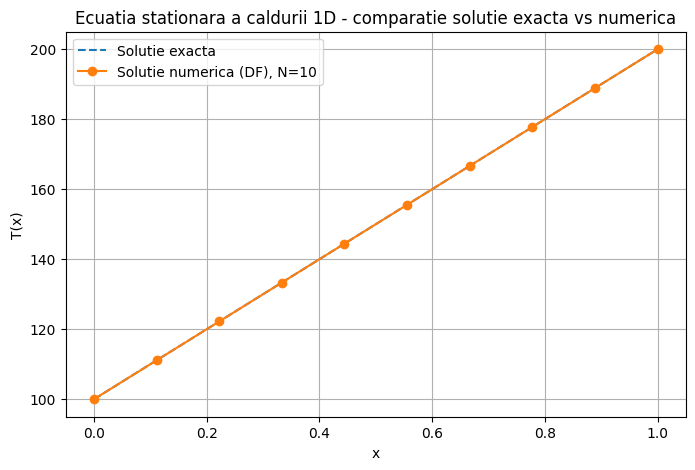

In [ ]:
L = 1.0
T0 = 100.0
TL = 200.0
N = 10

x, T_num = solve_heat_1d_stationary(N, L, T0, TL)
T_ex = exact_solution(x, L, T0, TL)

error_max = np.max(np.abs(T_num - T_ex))
print(f"Eroare maxima (N = {N}): {error_max:.2e}")

plt.figure(figsize=(8, 5))
plt.plot(x, T_ex, label='Solutie exacta', linestyle='--')
plt.plot(x, T_num, 'o-', label='Solutie numerica (DF), N={}'.format(N))
plt.xlabel('x')
plt.ylabel('T(x)')
plt.title('Ecuatia stationara a caldurii 1D - comparatie solutie exacta vs numerica')
plt.legend()
plt.grid(True)
plt.show()


N =   5, eroare maxima = 2.84e-14
N =  10, eroare maxima = 2.84e-14
N =  20, eroare maxima = 2.84e-14
N =  50, eroare maxima = 1.22e-12
N = 100, eroare maxima = 1.56e-12


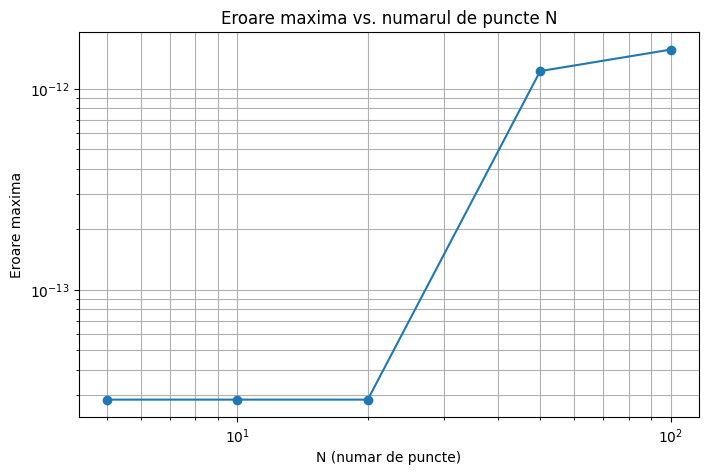

In [ ]:
L = 1.0
T0 = 100.0
TL = 200.0

N_values = [5, 10, 20, 50, 100]
errors = []

for N in N_values:
    x, T_num = solve_heat_1d_stationary(N, L, T0, TL)
    T_ex = exact_solution(x, L, T0, TL)
    error_max = np.max(np.abs(T_num - T_ex))
    errors.append(error_max)
    print(f"N = {N:3d}, eroare maxima = {error_max:.2e}")

plt.figure(figsize=(8, 5))
plt.loglog(N_values, errors, 'o-')
plt.xlabel('N (numar de puncte)')
plt.ylabel('Eroare maxima')
plt.title('Eroare maxima vs. numarul de puncte N')
plt.grid(True, which='both')
plt.show()
